# 서울시 구별 CCTV 현황 분석
---
[목표]
- 서울시 구별 CCTV 수 파악하고, 인구대비 CCTV 비율 파악해서 순위 비교하기
- 인구대비 CCTV 평균치 확인 후, CCTV 수가 과하게 부족한 구를 확인하기
- Pandas, matplotlib(시각화 라이브러리)의 기본적 사용법 확인하기

In [1]:
import numpy as np
import pandas as pd

### 연도별 CCTV 현황 데이터 로딩

In [2]:
CCTV_Seoul = pd.read_csv(
     './data/01. CCTV_in_Seoul.csv'
    ,encoding='UTF-8'
)
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


### 1. 컬럼명 확인
- columns attribute 사용

In [3]:
CCTV_Seoul.columns
# dtype='object' : ndarray의 데이터타입

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

### 2. 컬럼명 변경
- '기관명 > '구별' 로 변경하기

In [4]:
CCTV_Seoul.rename(
    columns={CCTV_Seoul.columns[0] : '구별'} 
    # CCTV_Seoul.columns[0] : 기관명 : 인덱싱을 활용하면 편리함
    , inplace=True
)

In [5]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


### 인구 현황 데이터 로딩

In [9]:
POP_Seoul = pd.read_excel(
     './data/01. population_in_Seoul.xls' #파일 지정
    ,header = 2 #두 번째 헤더까지 삭제함 (맨 위부터 두 행이 삭제됨)
    ,usecols = 'B,D,G,J,N' #가져올 컬럼 선택
)

In [10]:
POP_Seoul.head(3)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


### 컬럼명 변경
- 자치구 > 구별
- 인구수 > 계
- 계.1 > 한국인
- 계.2 > 외국인
- 65세이상고령자 > 고령자

In [11]:
POP_Seoul.rename(
    columns={ # 컬럼명 변경
         POP_Seoul.columns[0] : '구별'
        ,POP_Seoul.columns[1] : '인구수'
        ,POP_Seoul.columns[2] : '한국인'
        ,POP_Seoul.columns[3] : '외국인'
        ,POP_Seoul.columns[4] : '고령자'
    }
    , inplace=True #원본에 반영
)

In [12]:
POP_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


# CCTV  현황과 인구 현황의 데이터 파악하기

### 1. CCTV 데이터 파악
- 전체 구조 파악

In [53]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


- 소계 파악 후 정렬

In [54]:
CCTV_Seoul.sort_values(by='소계') # df 추출됨

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348
5,광진구,707,573,78,53,174
2,강북구,748,369,120,138,204
1,강동구,773,379,99,155,377
3,강서구,884,388,258,184,81
19,영등포구,904,495,214,195,373


- 가장 적은 5개 조회

In [55]:
CCTV_Seoul.sort_values(by='소계').head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


- 가장 많은 5개 조회

In [57]:
CCTV_Seoul.sort_values(by='소계').tail(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
14,서초구,1930,1406,157,336,398
18,양천구,2034,1843,142,30,467
0,강남구,2780,1292,430,584,932


### 최근 3년 간의 증감 비율

- 범죄율이 높은 지역에 CCTV 설치가 증가한다. 최대 증가율은 범죄 증가율과 연결된다.

In [58]:
CCTV_Seoul['최근증가율'] = CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] + \
CCTV_Seoul['2016년'] / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,1086.136223
1,강동구,773,379,99,155,377,353.472296
2,강북구,748,369,120,138,204,313.284553


In [59]:
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,1086.136223
4,관악구,1496,846,260,390,613,722.458629
22,종로구,1002,464,314,211,630,660.775862
8,노원구,1265,542,57,451,516,603.202952
21,은평구,1873,1138,224,278,468,543.124780


### 2. 인구 데이터 파악

In [60]:
POP_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


### 합계 제거
- 계산 가능한 컬럼은 빼는 게 좋음
- 필요할 때마다 계산해서 씀
- 차트로 만들었을 때 튀는 값이 됨

In [61]:
POP_Seoul.drop(labels=[0], inplace=True)

In [62]:
POP_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0


In [63]:
POP_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [64]:
POP_Seoul[POP_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [65]:
POP_Seoul['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [66]:
POP_Seoul.drop([26], inplace=True)

In [67]:
POP_Seoul[POP_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


### 비율로 변경하기 
- 비교하기 위해서는 비율로 변경하는 것이 유리함

In [68]:
POP_Seoul['외국인비율'] = POP_Seoul['외국인'] / POP_Seoul['인구수']*100
POP_Seoul['고령자비율'] = POP_Seoul['고령자'] / POP_Seoul['인구수']*100

In [69]:
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


### 인구 수가 많은 상위 5개 구

In [70]:
POP_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 외국인이 많은 상위 5개 구

In [71]:
POP_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


### 외국인 비율이 높은 상위 5개 구

In [72]:
POP_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


### 고령자 비율 높은 상위 5개 구

In [73]:
POP_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


### CCTV, POP 데이터프레임 병합

### 1. 데이터 확인

###### 1-1. 서울시 CCTV 현황

In [95]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,1086.136223
1,강동구,773,379,99,155,377,353.472296
2,강북구,748,369,120,138,204,313.284553


###### 1-2. 서울시 인구현황

In [96]:
POP_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


### 2. 데이터프레임 병합
    - 두 데이터프레임을 '구별' 컬럼 값을 기준으로 가로로 이어붙이기
    
###### 2-2. 이너조인

In [97]:
data_result = pd.merge( #data_result도 데이터프레임이 됨
     CCTV_Seoul #left
    ,POP_Seoul #right
    ,on='구별' #병합할 기준 컬럼 설정
)
data_result.head(3)
# CCTV 우측 옆에 POP 데이터 프레임이 병합됨

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,1086.136223,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,353.472296,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,313.284553,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


### 3. 병합한 데이터프레임(data_result)에서 불필요한 컬럼 삭제

In [98]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [99]:
data_result.head(3)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1086.136223,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,353.472296,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,313.284553,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


4. key로 사용할 컬럼을 row 인덱스로 만듦
    - set_index('컬럼명', inplace=True) : 컬럼을 인덱스로 보내는 메소드

In [100]:
data_result.set_index('구별', inplace=True)

In [101]:
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,1086.136223,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,353.472296,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,313.284553,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


### 5. 변수들 간의 관계 확인
###### - 평균: 분포의 중간부분 파악 ()
$$ 
\overline{x} = \frac{1}{n}\sum_{i=1}^n x_i 
$$
###### - 분산: 분포가 퍼져있는 정도 파악
$$
\begin{align}
s^2 &= \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2,\\
s &= \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2}
\end{align}
$$
###### - 공분산: 변수가 2개일 경우 퍼져있는 정도 파악
    
            : 음의관계: Cov(X,Y) < 0) 
            : 양의관계: Cov(X,Y) > 0) 
            : 관계없음: 공분산=0, Cov(X,Y) = 0, 두 변수가 선형관계가 없다, 각각이 독립변수다. (독립변수면 공분산이 0이 되지만, 역은 성립하지 않음)
            : Cov(X,Y) = E((X-x)(Y-y))
              (X, Y는 집합, x, y는 평균임)
            : 공분산은 X의 편차와 Y의 편차를 곱한 것의 평균이다.
            : 'E(X의 편차)의 제곱'은 분산이 됨
            : 수치적으로는 비교가 안됨
             
###### - 상관(Correlation)계수(Coefficient): 공분산을 수치화 한 것
    
            : -1<= coef <= 1 값을 나타냄
            : 수치적 비교가 가능해짐
            : Cov(X,Y) / root Var(X)*Var(Y)
            : root Var(X)*Var(Y): 각 변수의 표준 편차
            : 변수 x, y가 독립이면 상관계수는 0임
            : 상관관계가 연된관계는 아님

###### 5-1. 고령자비율과 CCTV소계의 상관관계 확인

In [102]:
np.corrcoef(data_result['고령자비율'], data_result['소계']) 
#정방행렬이 리턴됨

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

###### 5-2. 외국인비율과 소계 상관관계 확인

In [103]:
np.corrcoef(data_result['외국인비율'], data_result['소계']) 

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

###### 5-3. 인구수와 소계 상관관계 비교
        - 상관관계가 있다고 판단

In [104]:
np.corrcoef(data_result['인구수'], data_result['소계']) 

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

###### 5-4. 소계와 다른 변수들 간의 상관관계 확인

In [105]:
data_result.corrwith(data_result['소계'])
# 소계와 관련된 상관계수들 파악에 용이
# -(마이너스)는 크게 관계없음
# 인수구, 한국인, 고령자는 관계가 있음 (나머지는 없다고 봐도 무방함)

소계       1.000000
최근증가율    0.588374
인구수      0.306342
한국인      0.304287
외국인     -0.023786
고령자      0.255196
외국인비율   -0.136074
고령자비율   -0.280786
dtype: float64

###### 5-5. 두 컬럼의 상관계수

In [106]:
data_result['소계'].corr(data_result['인구수'])

0.3063422793679263

### 6. 정렬
###### 6-1. 소계로 내림차순 정렬

In [107]:
data_result.sort_values(by='소계', ascending=False).head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,1086.136223,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,197.339121,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,521.307255,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308


###### 6-2. 인구수 내임차순 정렬

In [108]:
data_result.sort_values(by='인구수', ascending=False).head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,176.523629,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,462.876289,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,1086.136223,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217


# CCTV 현황과 인구 현황을 그래프로 분석

In [154]:
# 윈도우에서 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [157]:
# 데이터 확인
data_result.head() #병합한 데이터임

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,1086.136223,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,353.472296,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,313.284553,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,462.876289,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,722.458629,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


<AxesSubplot:xlabel='구별'>

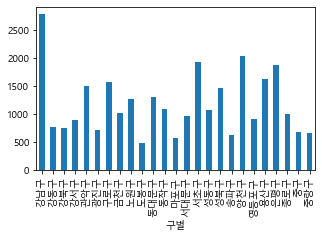

In [164]:
#데이터 프레임은 시각화 기능이 없음 > matplotlib이 시각화함
plt.figure(figsize=(5,3))
data_result['소계'].plot(# 한 시리즈만 시각화함
    kind='bar' #bar: 막대그래프
)

<AxesSubplot:ylabel='구별'>

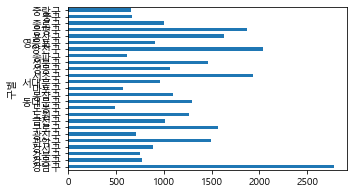

In [163]:
#데이터 프레임은 시각화 기능이 없음 > matplotlib이 시각화함
plt.figure(figsize=(5,3))
data_result['소계'].plot(# 한 시리즈만 시각화함
    kind='barh' #bar: 막대그래프, h: 수평
)

<AxesSubplot:xlabel='구별'>

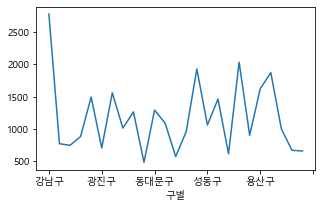

In [160]:
plt.figure(figsize=(5,3))
data_result['소계'].plot()

<AxesSubplot:xlabel='구별'>

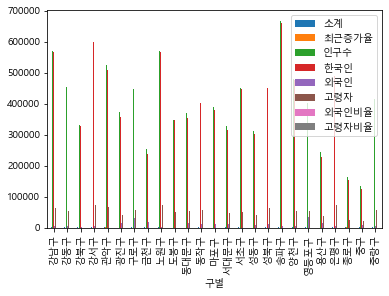

In [166]:
data_result.plot.bar()

<AxesSubplot:xlabel='구별'>

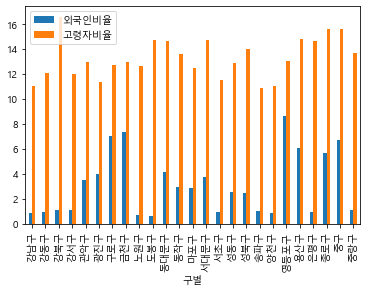

In [171]:
data_result[['외국인비율','고령자비율']].plot.bar()

<AxesSubplot:xlabel='구별'>

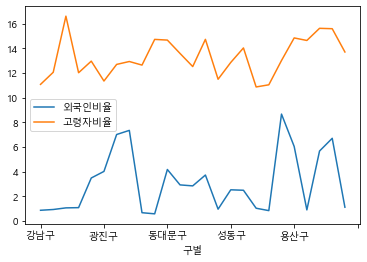

In [172]:
data_result[['외국인비율','고령자비율']].plot.line()

KeyError: "None of [Float64Index([ 11.07221735319895, 12.051637899270354, 16.600341619421428,\n              12.015794041459358, 12.955291475980705,  11.34284885158156,\n               12.68950642368166, 12.925255408064857, 12.634882609978504,\n              14.717507156255916, 14.661322450040053, 13.578250751478716,\n              12.515109752623516, 14.720796667104777, 11.488308054451378,\n              12.850689491203044, 14.025061787278325, 10.862598747833278,\n              11.036964194192233, 13.006191297442832, 14.836427070920505,\n              14.631018552230232,  15.61540351308193, 15.583908736115282,\n              13.696885185390698],\n             dtype='float64')] are in the [columns]"

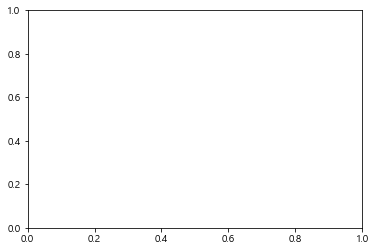

In [175]:
data_result.plot.scatter(
     data_result['고령자비율']
    ,data_result['외국인비율']
)

<AxesSubplot:ylabel='구별'>

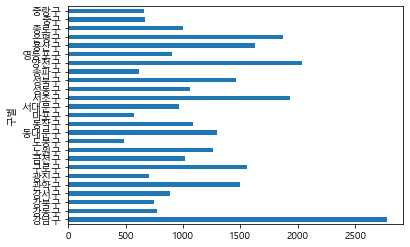

In [176]:
data_result['소계'].plot(
    kind='barh'
)

<AxesSubplot:ylabel='구별'>

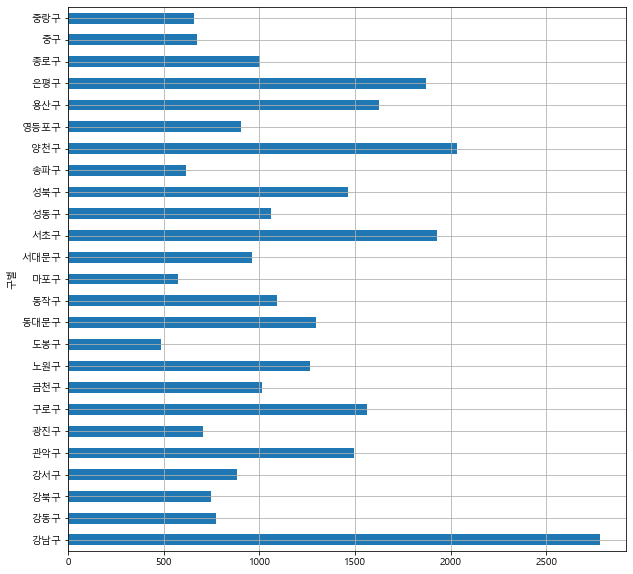

In [178]:
data_result['소계'].plot(
     kind='barh'
    ,grid=True
    ,figsize=(10,10)
)

<AxesSubplot:ylabel='구별'>

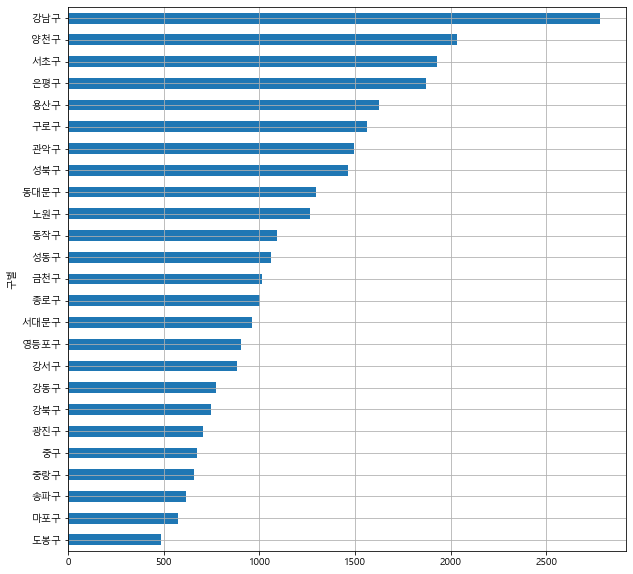

In [179]:
data_result['소계'].sort_values().plot(
     kind='barh'
    ,grid=True
    ,figsize=(10,10)
)

In [181]:
#인구수 대비 CCTV 비율
data_result['CCTV비율'] = data_result['소계']/data_result['인구수']*100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,1086.136223,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,353.472296,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,313.284553,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,462.876289,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,722.458629,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


<AxesSubplot:ylabel='구별'>

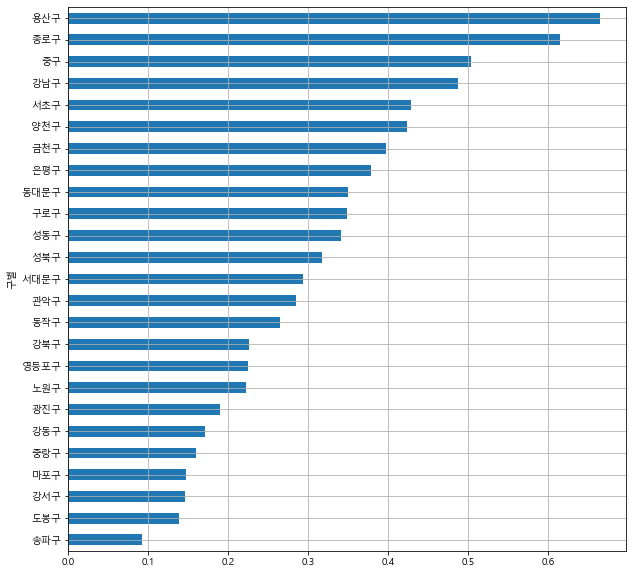

In [183]:
data_result['CCTV비율'].sort_values().plot(
     kind='barh'
    ,grid=True
    ,figsize=(10,10)
)

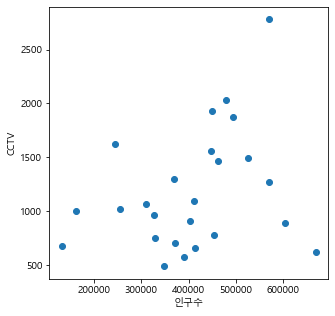

In [184]:
# 산점도: 인구수와 소계의 관계
plt.figure(figsize=(5,5))
plt.scatter(data_result['인구수'], data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

# 선형회귀: 오차의 합이 최소가 되는 계수가 a,b인 방정식 구하기

In [ ]:
# 인구수 대비 CCTV 비율
data_result['CCTV비율'] = data_result['소계']/data_result['인구수'] * 100
data_result.head(3)

In [ ]:
# 산점도 : 인구수, 소계
plt.figure(figsize=(5,5))
plt.scatter(data_result['인구수'], data_result['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(
      data_result['인구수']
    , data_result['소계']
    , s = 50
    , c=data_result['오차']
)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='green')
for n in range(10):
    plt.text(
          df_sort['인구수'][n]
        , df_sort['소계'][n]
        , df_sort.index[n]
        , fontsize=15
    )
plt.xlabel('인구수')
plt.ylabel('소계')
plt.colorbar()
plt.show()